In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
%matplotlib inline

Fit User guide
=====================




data format
-------------------------

The SED data can be stored in ASCII file in a  quite flexible way, but some requirements are needed:

 - you must provide at least two columns for frequencies and fluxes
 - frequencies are in *Hz*
 - fluxes are in  *cgs*, .....

The header of the file can contain some meta-data that are sourced when the data are loaded.
The meta-data available are :

 - z : redhsift
 - resframe: restframe of the data `src` or `obs` 
 - data_scale: scale of the data `lin-lin` or `log-log`
 - dataType: structure of the comumns with the SED data




In [3]:
# metadata
# md z  0.0308
# md restframe  obs
# md data_scale  lin-lin
# md col_types x,y,dy,data_set
# md obj_name     J1104+3812,Mrk421
#

A typical structure of SED data file, including meta-data declaration  is the following:


```
# metadata
# md z  0.0308
# md restframe  obs
# md data_scale  lin-lin
# md col_types x,y,dy,data_set
# md obj_name     J1104+3812,Mrk421
#
# Frequency [Hz]  EnergyFlux [erg/cm2/s]
#  Xval	    	  Yval	     YvalError    data_set-flag
2.299540e+09 1.340900e-14 3.910000e-16    campaing-2009
2.639697e+09 1.793088e-14 3.231099e-26    campaing-2009
4.799040e+09 2.313600e-14 2.400000e-16    campaing-2009
4.805039e+09 1.773414e-14 1.773414e-15    campaing-2009
4.843552e+09 2.776140e-14 2.615339e-26    campaing-2009
7.698460e+09 3.696000e-14 4.620000e-16    campaing-2009
8.267346e+09 2.836267e-14 2.836267e-15    campaing-2009
8.331867e+09 3.989630e-14 3.627671e-26    campaing-2009
8.388659e+09 3.163450e-14 1.931495e-15    campaing-2009
8.399994e+09 4.000500e-14 5.041094e-15    campaing-2009
1.044892e+10 4.626737e-14 3.297726e-26    campaing-2009
1.109778e+10 4.617600e-14 6.660000e-16    campaing-2009
1.456571e+10 5.628417e-14 4.453463e-26    campaing-2009
```


Loading SEDs
-------------

In [4]:
from jetset.test_data_helper import  test_SEDs
test_SEDs

['/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.dat',
 '/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat',
 '/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.dat']

to load the SED of  Mrk 421, the first one in the list:

In [5]:
mySED=test_SEDs[1]
from jetset.data_loader import ObsData
sed_data=ObsData(data_file=mySED)


*** getting meta-data from file header
col_types None
set md z  to 0.0308
set md restframe  to obs
set md data_scale  to lin-lin
set md col_types  to x,y,dy,data_set
set md obj_name  to J1104+3812,Mrk421
ciccio x,y,dy,data_set
col_types x,y,dy,data_set

col_types c x,y,dy,data_set

*** loading data ***
---> loading data for file=/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/jetset-1.2.0-py3.6-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.dat
---> found these col ID=range(0, 4) and names=['x', 'y', 'dy', 'data_set']:
---> z=3.080000e-02
---> restframe=obs
---> obj_name=J1104+3812,Mrk421 
---> data_scale=lin-lin 
col_types ['x', 'y', 'dy', 'data_set']
['x', 'y', 'dy', 'data_set'] range(0, 4)
nu_data x
nuFnu_data y
dnuFnu_data dy
data_set data_set
---> data len=112
---> replacing zero error with relative error  0.2
---> final data len 112



As you can see the all the meta-data have been properly sourced from the SED file header. You also get information on 
the lenght of the data, before and after elimination of duplicated entries, and upper limits
These meta-data are parameters needed by the 

Plotting data
-----------------

[8.480601691316195, 27.863465787911494] [0. 0.]


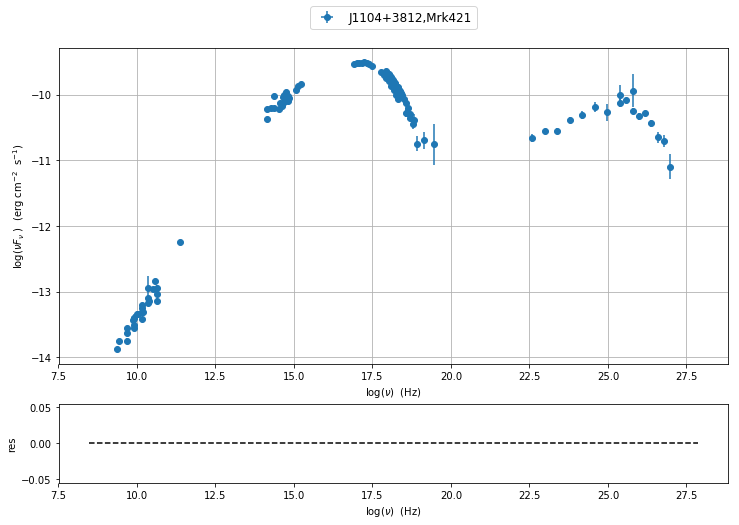

In [6]:
from jetset.plot_sedfit import Plot
myPlot=Plot(sed_data)
myPlot.show()

grouping data
-----------------------------------
As you can see, due to the overlapping of different instruments and to different time snapshots, 
some points have multiple values. Although this is not a problem for the fit process, you might 
want to rebin your data. This can be obtained with the following command:

In [7]:
sed_data.group_data(bin_width=0.2)


***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2




handling errors and systematics
-----------------------------------
Another important issues when dealing with fitting of data, is the proper handling of errors.
Typically one might need to add systematics for different reasons:
 
 - data are not really simultaneous, and you want to add systematics to take this into account
 - data (typically IR up to UV), might have very small errors compared to those at higher energies.
   This might bias the minimizer to accomodate the parameters  in order to fit 'better' the low
   frequencies branch.
  
For these reasons the package offer the possibility to add systematics 
  
  

[8.381888978511379, 27.97292829804506] [0. 0.]


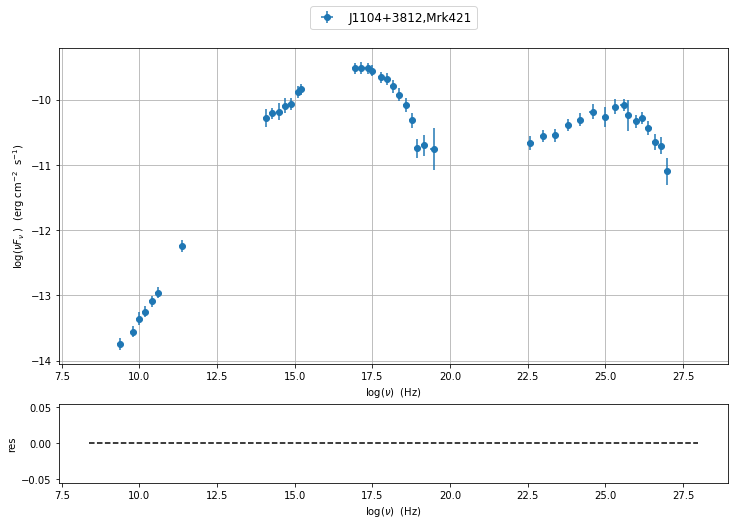

In [8]:
sed_data.add_systematics(0.2,[10.**6,10.**29])
myPlot=Plot(sed_data)
myPlot.show()

SEDShape: Spectral indices
-------------------------

In [12]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(minimizer='lsb',silent=True)


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.402754e+00, err=1.250721e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.109667e+00, err=5.233777e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.778730e+00, err=8.336743e-02 

---> initial range for i

[8.381888978511379, 27.97292829804506] [0. 0.]


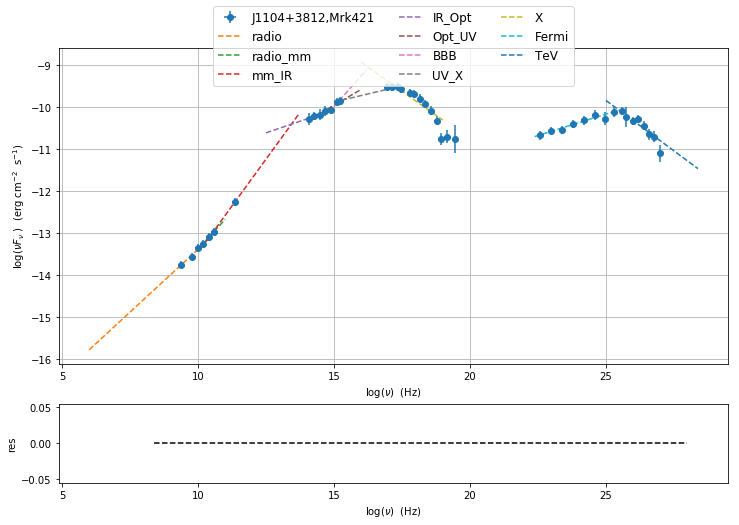

In [11]:
p=my_shape.plot_indices()


SEDShape: Log-Log Polynomila fit
-------------------------------

In [13]:
myPlot.save('SED_indices_rebinned.png')


my_shape.sync_fit(check_host_gal_template=True,minimizer='minuit',fit_range=[10,19])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 19]


FCN = 13.284604107167203 
 TOTAL NCALL = 398 
 NCALLS = 398 
 
 
 EDM = 2.1272537435733377e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,par_0,-0.161658,0.012275,,,-10,0,No
1,par_1,-0.0112831,0.00187672,,,-10,10,No
2,par_2,16.6994,0.0494283,,,0,30,No
3,par_3,-9.48058,0.036992,,,-30,0,No


---> class:  HSP



FCN = 13.064442640655018 
 TOTAL NCALL = 665 
 NCALLS = 657 
 
 
 EDM = 4.928899697652773 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,par_0,-0.163463,0.0127406,,,-10,0,No
1,par_1,-0.0116222,0.00197459,,,-10,10,No
2,par_2,16.7139,0.0561725,,,0,30,No
3,par_3,-9.48248,0.0372176,,,-30,0,No
4,par_4,-11.2147,0.734734,,,-11.4806,-7.48058,No
5,par_5,0.0254478,0.000283904,,,-0.5,0.5,No



**************************************************************************************************
Fit report

Model: sync-shape-fit
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 b                | curvature                |                  | -1.634633e-01 | [-1.000000e+01,+0.000000e+00]  
 c                | third-degree             |                  | -1.162221e-02 | [-1.000000e+01,+1.000000e+01]  
 Ep               | peak freq                | Hz               | +1.671387e+01 | [+0.000000e+00,+3.000000e+01]  
 Sp               | peak flux                | erg cm^-2 s^-1   | -9.482476e+00 | [-3.000000e+01,+0.000000e+00]  
 nuFnu_p_host     | nuFnu-scale              | erg cm^-2 s^-1   | -1.12

In [14]:
my_shape.IC_fit()


*** Log-Polynomial fitting of the IC component ***
---> fit range: [22, 28]
---> LogCubic fit


FCN = 3.4399462169488366 
 TOTAL NCALL = 214 
 NCALLS = 214 
 
 
 EDM = 3.309614688792438e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,par_0,-0.205605,0.0400183,,,-10,0,No
1,par_1,-0.0499058,0.015632,,,-10,10,No
2,par_2,25.2592,0.107537,,,0,30,No
3,par_3,-10.1224,0.0476766,,,-30,0,No



**************************************************************************************************
Fit report

Model: IC-shape-fit
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 b                | curvature                |                  | -2.056045e-01 | [-1.000000e+01,+0.000000e+00]  
 c                | third-degree             |                  | -4.990579e-02 | [-1.000000e+01,+1.000000e+01]  
 Ep               | peak freq                | Hz               | +2.525916e+01 | [+0.000000e+00,+3.000000e+01]  
 Sp               | peak flux                | erg cm^-2 s^-1   | -1.012238e+01 | [-3.000000e+01,+0.000000e+00]  
-------------------------------------------------------------------------

[8.381888978511379, 27.97292829804506] [0. 0.]


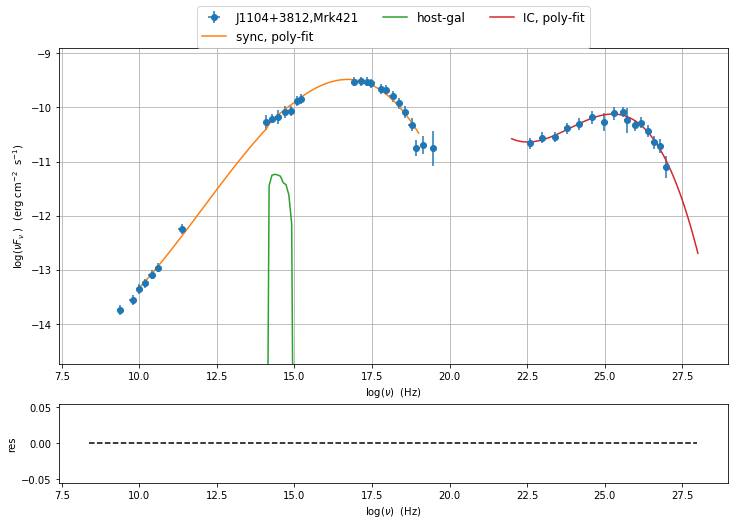

In [15]:
p=my_shape.plot_sahpe_fit()
p.rescale(y_min=sed_data.data['nuFnu_data_log'].min()-1)

In [28]:
my_shape.show_values()


*** SEDShape values ***
---> spectral inidces values
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.402754e+00, err=1.250721e-01 
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.109667e+00, err=5.233777e-02 
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.778730e+00, err=8.336743e-02 
---> name = Opt_UV           range=[14.000,16.000] log(Hz)  photon.val=-1.621180e+00, err=4.761704e-02 
---> name = BBB              range=[14.800,16.200] log(Hz)  photon.val=-1.273282e+00, err=1.558347e-01 
---> name = UV_X             range=[15.000,17.500] log(Hz)  photon.val=-1.845844e+00, err=1.974302e-02 
---> name = X                range=[16.000,19.000] log(Hz)  photon.val=-2.458173e+00, err=7.557519e-02 
---> name = Fermi            range=[22.380,25.380] log(Hz)  photon.val=-1.795555e+00, err=1.996362e-02 
---> name 

Constraining SSC/EC model
-------------------------

In [39]:
from jetset.obs_constrain import ObsConstrain

sed_obspar=ObsConstrain(beaming=25,B_range=[0.01,0.1],distr_e='pl',t_var_sec=3*86400,nu_cut_IR=9.0E12,SEDShape=my_shape)

In [40]:
jet_model=sed_obspar.constrain_SSC_model()


***  constrains parameters from observable ***
-----------------------------------------------------------------------------------------
model parameters for jet model:
electron distribution type = pl  
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.000000e+08 | [+1.000000e+00,No           ]  
 p                | HE_spectral_slope        |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01]  
 

In [41]:
jet_model.show_model()

-----------------------------------------------------------------------------------------
model parameters for jet model:
electron distribution type = pl  
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +7.379585e+00 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +1.001469e+03 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +6.505422e+05 | [+1.000000e+00,No           ]  
 p                | HE_spectral_slope        |                  | +3.500000e+00 | [-1.000000e+01,+1.000000e+01]  
 R                | region_size              | cm

[8.381888978511379, 27.97292829804506] [0. 0.]
[4.806, 31.073999999999998] [0. 0.]


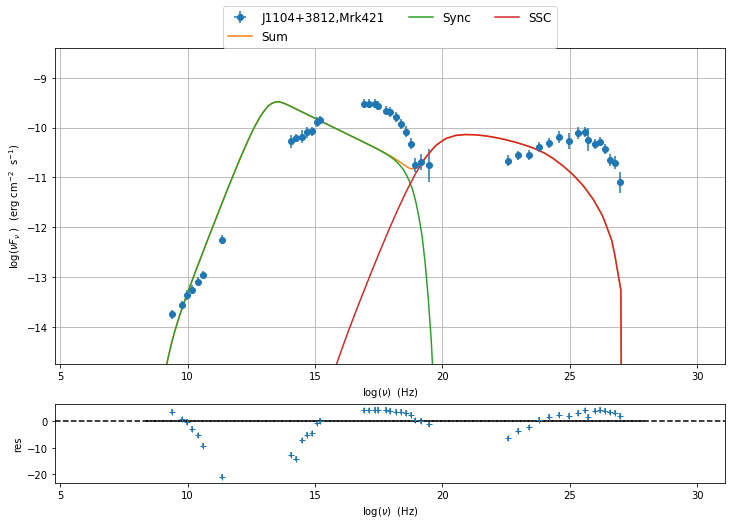

In [42]:
p=jet_model.plot_model(SEDdata=sed_data,autoscale=True)
p.rescale(y_min=sed_data.data['nuFnu_data_log'].min()-1)
p.add_residual_plot(jet_model,sed_data)

SSC/EC fitting
--------------

In [43]:
from jetset.model_manager import FitModel
from jetset.minimizer import  fit_SED

fit_model=FitModel( jet=jet_model, name='SSC-best-fit',  template=my_shape.host_gal)

fit_model.set('z_cosm','frozen')

fit_model.set('beam_obj','frozen')

fit_model.set('nuFnu_p_host','frozen')

#fit_model.set('r',fit_range=[0.5,10.5])

fit_model.show_pars()
    
best_fit=fit_SED(fit_model,sed_data,10.0**11 ,10**28.0,fitname='SSC-best-fit-lppl',minimizer='lsb')

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +7.379585e+00 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +1.001469e+03 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +6.505422e+05 | [+1.000000e+00,No           ]  
 p                | HE_spectral_slope        |                  | +3.500000e+00 | [-1.000000e+01,+1.000000e+01]  
 R                | region_size              | cm               | +1.889060e+16 | [+0.000000e+00,No           ]  
 B                | magnetic_field           | G                | +1.000000e-01 | [+0.00000

[8.381888978511379, 27.97292829804506] [0. 0.]
[4.806, 31.073999999999998] [0. 0.]


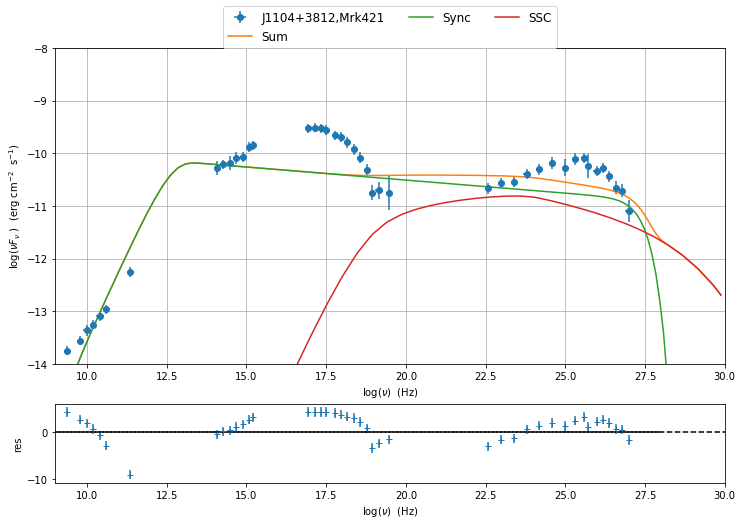

In [44]:
p=jet_model.plot_model(SEDdata=sed_data)
p.add_residual_plot(data=sed_data,model=jet_model)
p.rescale(y_min=-14,y_max=-8,x_min=9.0,x_max=30)


In [31]:
from jetset.model_manager import FitModel
from jetset.minimizer import  fit_SED

fit_model=FitModel( jet=jet_model, name='SSC-best-fit',  template=my_shape.host_gal)

fit_model.set('z_cosm','frozen')

fit_model.set('beam_obj','frozen')

fit_model.set('nuFnu_p_host','frozen')

#fit_model.set('r',fit_range=[0.5,10.5])

fit_model.show_pars()
    
best_fit=fit_SED(fit_model,sed_data,10.0**11 ,10**28.0,fitname='SSC-best-fit-lppl',minimizer='minuit')

--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +3.246468e-02 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +3.118428e+03 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.770674e+09 | [+1.000000e+00,No           ]  
 p                | LE_spectral_slope        |                  | +2.342481e+00 | [-1.000000e+01,+1.000000e+01]  
 gamma_cut        | turn-over-energy         | Lorentz-factor   | +5.068781e+05 | [+1.000000e+00,No           ]  
 R                | region_size              | cm               | +9.303388e+16 | [+0.00000

FCN = 35.29344053422126 
 TOTAL NCALL = 213 
 NCALLS = 213 
 
 
 EDM = 5.2773336407362536e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,par_0,0.0327139,0.00257099,,,0,,No
1,par_1,3132.8,0.27227,,,1,,No
2,par_2,1.77067e+09,2,,,1,,No
3,par_3,2.34348,0.0294774,,,-10,10,No
4,par_4,506878,2,,,1,,No
5,par_5,9.30339e+16,0,,,0,,No
6,par_6,0.0137626,0.000720514,,,0,,No
7,par_7,0.0523901,0.000797163,,,-0.5,0.5,No



**************************************************************************************************
Fit report

Model: SSC-best-fit-lppl
--------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                     | Units            | value         | phys. boundaries
--------------------------------------------------------------------------------------------------------------
 N                | electron_density         | cm^-3            | +3.271388e-02 | [+0.000000e+00,No           ]  
 gmin             | low-energy-cut-off       | Lorentz-factor   | +3.132800e+03 | [+1.000000e+00,No           ]  
 gmax             | high-energy-cut-off      | Lorentz-factor   | +1.770674e+09 | [+1.000000e+00,No           ]  
 p                | LE_spectral_slope        |                  | +2.343477e+00 | [-1.000000e+01,+1.000000e+01]  
 gamma_cut        | turn-over-energy         | Lorentz-factor   | +5

[8.381888978511379, 27.97292829804506] [0. 0.]
[4.806, 31.073999999999998] [0. 0.]


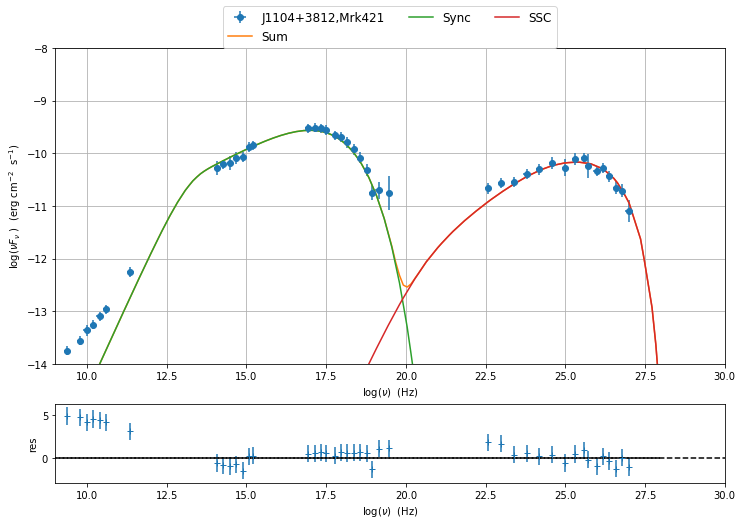

In [32]:
p=jet_model.plot_model(SEDdata=sed_data)
p.add_residual_plot(data=sed_data,model=jet_model)
p.rescale(y_min=-14,y_max=-8,x_min=9.0,x_max=30)

In [48]:
jet_model._blob.gamma_grid_size


1001

In [4]:
from jetset import jet_model
myJet=jet_model.Jet(name='test',electron_distribution='lppl',)

In [5]:
myJet.eval()

<IPython.core.display.Javascript object>


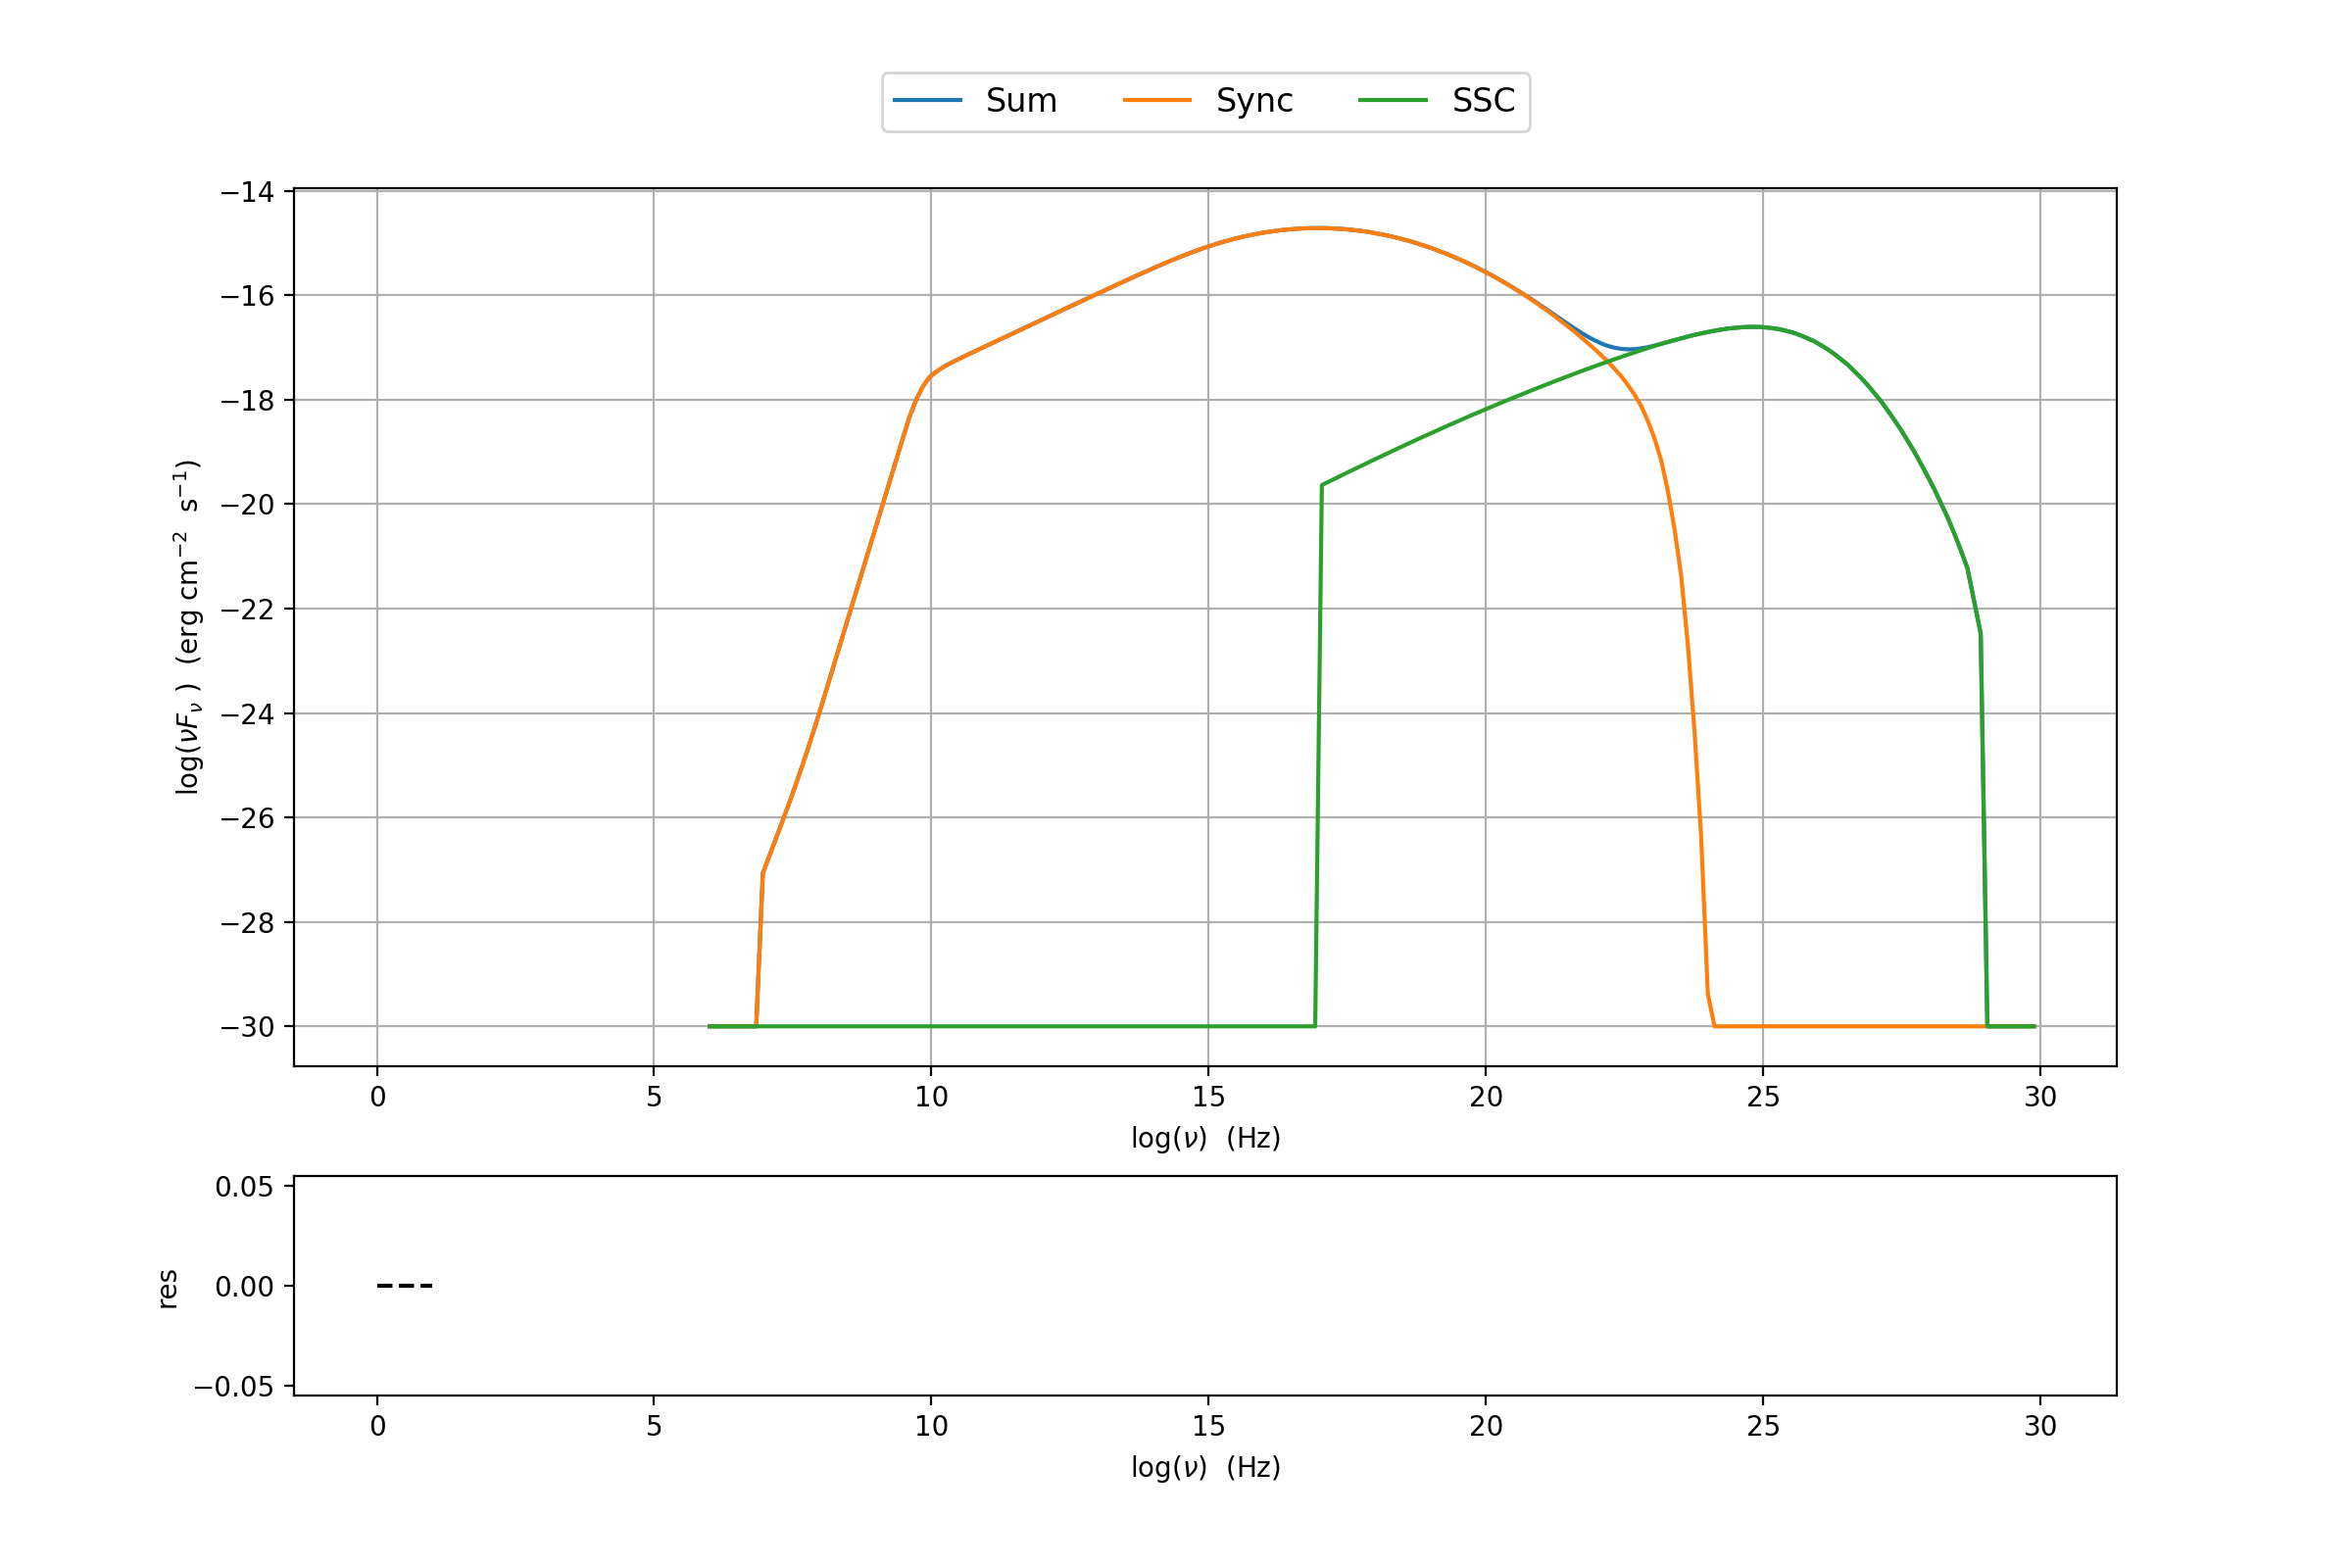

[0.0, 1.0] [0. 0.]


In [9]:
%matplotlib notebook
p=myJet.plot_model(autoscale=False)


In [10]:
cat={'cat_column_descr': [['meta_ID', '<i8'],
  ['src_names', '|S20'],
  ['significance', '<f4'],
  ['ra', '<f4'],
  ['dec', '<f4']],
 'cat_column_list': [[1, 2, 3, 4, 5, 6],
  ['1E 1740.7-2942',
   '4U 1700-377',
   'GX 349 2',
   'GX 354-0',
   'IGR J17252-3616',
   'OAO 1657-415'],
  [6.479658603668213,
   114.74475860595703,
   18.079566955566406,
   11.41795825958252,
   6.354801654815674,
   20.880935668945312],
  [265.97845458984375,
   255.98753356933594,
   256.4396057128906,
   262.9837951660156,
   261.3133850097656,
   255.20518493652344],
  [-29.745166778564453,
   -37.84343338012695,
   -36.424190521240234,
   -33.84116744995117,
   -36.26913070678711,
   -41.6541633605957]],
 'cat_column_names': ['meta_ID',
  'src_names',
  'significance',
  'ra',
  'dec'],
 'cat_coord_units': 'deg',
 'cat_frame': 'fk5',
 'cat_lat_name': 'dec',
 'cat_lon_name': 'ra'}

In [11]:
cat

{'cat_column_descr': [['meta_ID', '<i8'],
  ['src_names', '|S20'],
  ['significance', '<f4'],
  ['ra', '<f4'],
  ['dec', '<f4']],
 'cat_column_list': [[1, 2, 3, 4, 5, 6],
  ['1E 1740.7-2942',
   '4U 1700-377',
   'GX 349 2',
   'GX 354-0',
   'IGR J17252-3616',
   'OAO 1657-415'],
  [6.479658603668213,
   114.74475860595703,
   18.079566955566406,
   11.41795825958252,
   6.354801654815674,
   20.880935668945312],
  [265.97845458984375,
   255.98753356933594,
   256.4396057128906,
   262.9837951660156,
   261.3133850097656,
   255.20518493652344],
  [-29.745166778564453,
   -37.84343338012695,
   -36.424190521240234,
   -33.84116744995117,
   -36.26913070678711,
   -41.6541633605957]],
 'cat_column_names': ['meta_ID', 'src_names', 'significance', 'ra', 'dec'],
 'cat_coord_units': 'deg',
 'cat_frame': 'fk5',
 'cat_lat_name': 'dec',
 'cat_lon_name': 'ra'}